In [2]:
from qiskit import *
from math import pi
theta = pi

In [9]:
def zplg(i1, i2, i3, i4, i5):
    qc = QuantumCircuit(5,5)
    
    if i1 == '1':
        qc.x(0)
    if i2 == '1':
        qc.x(1)
    if i3 == '1':
        qc.x(2) 
    if i4 == '1':
        qc.x(3)
    if i5 == '1':
        qc.x(4)
    
    qc.barrier()
    qc.cx(1, 4)
    qc.cx(3, 0)
    
    qc.cp(theta, 0, 3)
    qc.cp(theta, 1, 3)
    qc.cx(0, 1)
    qc.cp(theta, 2, 3)
    qc.cx(1, 2)
    qc.cu1(-theta/2, 2, 3)
    qc.cx(3, 4)
    
    qc.measure(0, 4)
    qc.measure(1, 3)
    qc.measure(2, 2)
    qc.measure(3, 1)
    qc.measure(4, 0)
    
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots = 1, memory = True)
    output = job.result().get_memory()[0]
    
    return qc, output

input is  0 0 0 0 0 output is  00000
input is  0 0 0 0 1 output is  00001
input is  0 0 0 1 0 output is  11111
input is  0 0 0 1 1 output is  11110
-------------------------------------
input is  0 0 1 0 0 output is  00100
input is  0 0 1 0 1 output is  00101
input is  0 0 1 1 0 output is  11011
input is  0 0 1 1 1 output is  11010
-------------------------------------
input is  0 1 0 0 0 output is  01101
input is  0 1 0 0 1 output is  01100
input is  0 1 0 1 0 output is  10010
input is  0 1 0 1 1 output is  10011
-------------------------------------
input is  0 1 1 0 0 output is  01001
input is  0 1 1 0 1 output is  01000
input is  0 1 1 1 0 output is  10110
input is  0 1 1 1 1 output is  10111
-------------------------------------
input is  1 0 0 0 0 output is  11100
input is  1 0 0 0 1 output is  11101
input is  1 0 0 1 0 output is  00011
input is  1 0 0 1 1 output is  00010
-------------------------------------
input is  1 0 1 0 0 output is  11000
input is  1 0 1 0 1 output is  11

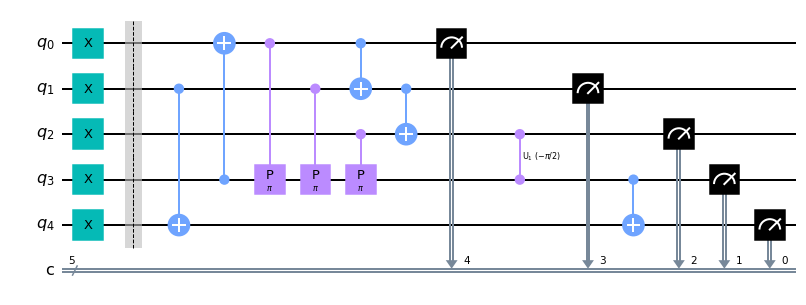

In [10]:
for i1 in ['0', '1']:
    for i2 in ['0', '1']:
        for i3 in ['0', '1']:
            for i4 in ['0', '1']:
                for i5 in ['0', '1']:
                    qc, output = zplg(i1, i2, i3, i4, i5)
                    print("input is ", i1, i2, i3, i4, i5, "output is ", output )
            print("-------------------------------------")
qc.draw('mpl')